In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [22]:
S0 = 5.1
up_barrier = S0 * 1.05
down_barrier = S0 * 0.68
R = 0.28
rf = 0.04
q = 0.01
Smax = S0 * 3
Smin = 0
Nt = 500
Ns = 500
sigma = 0.5
mc_count = 100000

In [23]:
from snow_ball.option.snow_ball import OptionSnowBall
from snow_ball.date_util import DateUtil, OptionDateCollection
from snow_ball.pricer import SnowBallPricer
from snow_ball.mc_3 import ( delta_hedging_portfolio, delta_portfolio_return,
    simulation, snowball_cashflow)

T0 = datetime.datetime(2019, 1, 3)
T_start = datetime.datetime(2019, 1, 4)
T_right = datetime.datetime(2020, 1, 2)
Tn = datetime.datetime(2019, 12, 27)
date_util = DateUtil(OptionDateCollection(T0, T_start, Tn, T_right))
snow_ball = OptionSnowBall(R, up_barrier, down_barrier, date_util)
pricer = SnowBallPricer(snow_ball, rf, q, Smax, S0, Nt, Ns, sigma)

price_path = simulation(S0, rf, sigma, mc_count, False)
payoff, knock_out_times, knock_in_times, existence_times, Tout = snowball_cashflow(price_path, R, mc_count, 1, S0)
portfolio = delta_hedging_portfolio(price_path, pricer)
portfolio_return = delta_portfolio_return(portfolio, price_path)


In [36]:
np.std(payoff)

0.22913490322185542

In [37]:
np.std(payoff + portfolio_return)

0.27114774489580934

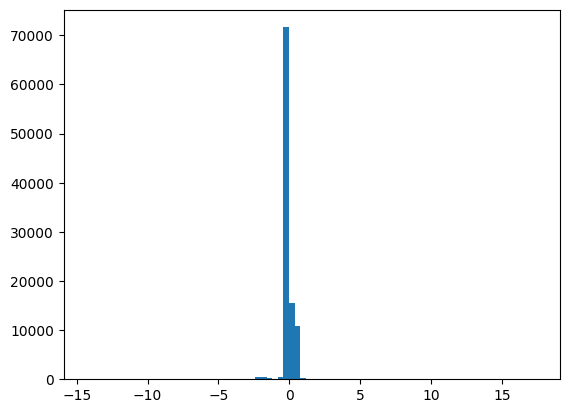

In [26]:
plt.hist(portfolio_return , bins=80)
plt.show()

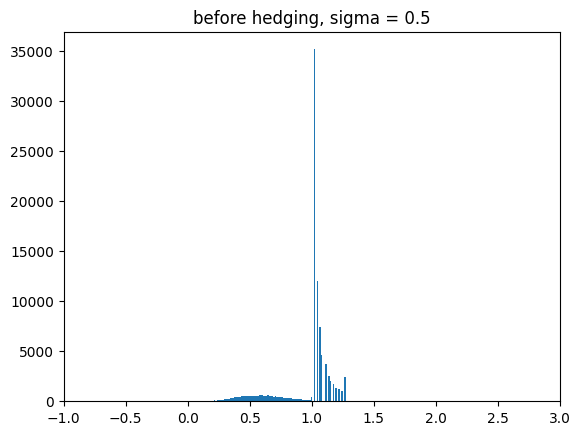

In [40]:
plt.hist(payoff , bins=100)
plt.xlim((-1,3))
plt.title(f"before hedging, sigma = {sigma}")
plt.show()

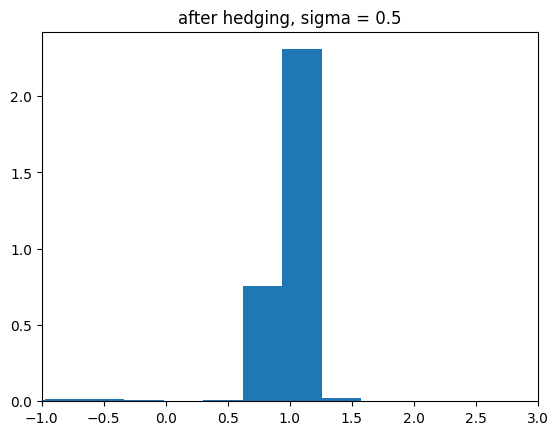

In [39]:
plt.hist(payoff + portfolio_return, bins=100)
plt.xlim((-1,3))
plt.title(f'after hedging, sigma = {sigma}')
plt.show()